In [1]:
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid
import numpy as np
import matplotlib as mpl

In [2]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['hiptlXgalaxy', 'vnXgalaxy']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        kmin = rlib.results['pk'][0].xvalues[0]
        master.loadResults(rlib.results['pk'])

smfont = 10
larfont = 12

1
1
1
1
1
1
1
1
1
1
The row values for ratio: ['no key found']
The column values for is_particle: [False]


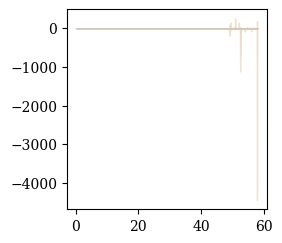

In [3]:
# make ratios
ip = {'snapshot':99, 'color':['red', 'blue']}
dl = DataList(master.getMatching(ip))
rob = flib.makeBlueRedRatio(dl)
robdl = DataList(rob)
fgrob = Figrid(robdl)
fgrob.arrange('ratio', 'is_particle', panel_length = 2)
fkw = {}
fkw['label'] = 'Real Space'
fkw['color'] = 'gray'
fkw['alpha'] = 0.35
fgrob.makeFills({'space':'real'}, fkw)
fkw['label'] = 'Redshift Space'
fkw['color'] = 'tan'
fgrob.makeFills({'space':'redshift'}, fkw)
fgrob.plot()

In [4]:
%%capture
box = dl.getAttrVals('box')[0]
res = dl.getAttrVals('grid_resolution')[0]
ip = {'snapshot':99, 'color':['red', 'blue']}
dl = DataList(master.getMatching(ip))
fg = Figrid(dl)
fg.setColOrder(['real', 'redshift'])
fg.arrange('space', 'is_particle', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
pargs = {}
pargs['label'] = 'Blue Galaxies'
pargs['color'] = 'blue'
pargs['alpha'] = 0.55
fg.makeFills({'color':'blue'}, pargs)
pargs['label'] = 'Red Galaxies'
pargs['color'] = 'red'
fg.makeFills({'color':'red'}, pargs)
fg.combineFigrids(fgrob);

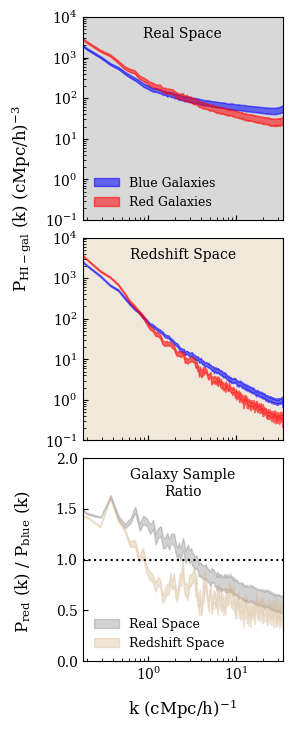

In [5]:
fg.plot()

pkslc = (slice(0,2), slice(None))
# fix the axes
axparams = {}
flib.setNyq(fg, kmin, res, box)
axparams['xscale'] = 'log'
axparams['ylim'] = [0, 2]
fg.setAxisParams(axparams)
axparams['yscale'] = 'log'
axparams['ylim'] = [0.1, 1e4]
fg.setAxisParams(axparams, slc=pkslc)
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})
# labels
kw = {'fontsize':larfont}
ypos = [0, 1 - 0.5*(fg.panel_length * 2 + fg.panel_bt[1] * 1 + fg.yborder[1]) / fg.figsize[1]]
flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Real Space', 'Redshift Space', 'Galaxy Sample\nRatio'], [0.5, 0.95],
               txtkw)
fg.makeYLabel(r'P$_{\rm{red}}$ (k) / P$_{\rm{blue}}$ (k)', 
              [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
              {'va':'center', 'fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (0,0))
# lkw['loc'] = 'center right'
fg.drawLegend(lkw, (2,0))
fcolors = np.empty(fg.dim, dtype = object)
trgba = mpl.colors.to_rgba
alpha = 0.3
fcolors[:,0] = [trgba('gray', alpha), trgba('tan', alpha), trgba('white')]
flib.setFacecolor(fg, fcolors)
flib.plotOnes(fg, (2,0))
fg.fig

In [7]:
rbonly = DataList(master.getMatching({'color':['red', 'blue']}))
withrat = flib.makeBlueRedRatio(rbonly)
rbonly.dclist.extend(withrat)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [15]:
%%capture
import seaborn as sb
fg = Figrid(rbonly)
fg.setRowOrder(['real', 'redshift'])
fg.setColOrder(['blue', 'red', 'ratio'])
fg.arrange('color', 'space', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
zcols = sb.color_palette('summer', len(master.getAttrVals('snapshot')))
pargs = {}
pargs['label'] = 'z=0'
pargs['color'] = zcols[0]
pargs['alpha'] = 0.55
fg.makeFills({'snapshot': 99}, pargs)
pargs['label'] = 'z=0.5'
pargs['color'] = zcols[1]
fg.makeFills({'snapshot':67}, pargs)

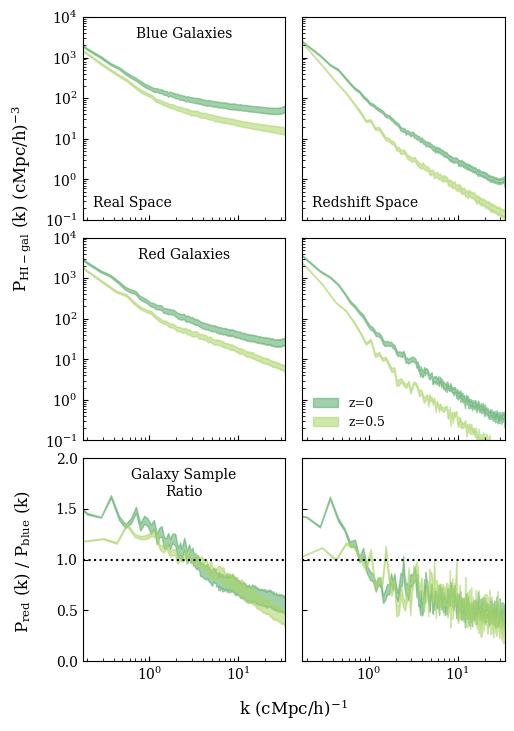

In [16]:
fg.plot()

pkslc = (slice(0,2), slice(None))
# fix the axes
axparams = {}
flib.setNyq(fg, kmin, res, box)
axparams['xscale'] = 'log'
axparams['ylim'] = [0, 2]
fg.setAxisParams(axparams)
axparams['yscale'] = 'log'
axparams['ylim'] = [0.1, 1e4]
fg.setAxisParams(axparams, slc=pkslc)
# axparams['ylim'] = [1, 1e4]
# fg.setAxisParams(axparams, slc=(slice(0,1), slice(0,2)))
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})
# labels
kw = {'fontsize':larfont}
ypos = [0, 1 - 0.5*(fg.panel_length * 2 + fg.panel_bt[1] * 1 + fg.yborder[1]) / fg.figsize[1]]
flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'Galaxy Sample\nRatio'], [0.5, 0.95],
               txtkw)
txtkw['ha'] = 'left'
txtkw['va'] = 'bottom'
fg.setColLabels(['Real Space', 'Redshift Space'], [0.05, 0.05], txtkw)
fg.makeYLabel(r'P$_{\rm{red}}$ (k) / P$_{\rm{blue}}$ (k)', 
              [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
              {'va':'center', 'fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (1,1))
lkw['loc'] = 'center right'
# fg.drawLegend(lkw, (2,0))
fcolors = np.empty(fg.dim, dtype = object)
trgba = mpl.colors.to_rgba
alpha = 0.15
for i in range(2):
    flib.plotOnes(fg, (2, i))
# fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('white')]
# flib.setFacecolor(fg, fcolors)
fg.fig

In [17]:
fg.save("redvsblue_redshift_evo.pdf")